In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 


In [5]:
# Loading dataset
data = pd.read_csv(r'C:\Users\MMC\Desktop\customer_churn_dataset-testing-master.csv')
print(data.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         1003 non-null   int64 
 1   Age                1003 non-null   int64 
 2   Gender             1003 non-null   object
 3   Tenure             1003 non-null   int64 
 4   Usage Frequency    1003 non-null   int64 
 5   Support Calls      1003 non-null   int64 
 6   Payment Delay      1003 non-null   int64 
 7   Subscription Type  1003 non-null   object
 8   Contract Length    1003 non-null   object
 9   Total Spend        1003 non-null   int64 
 10  Last Interaction   1003 non-null   int64 
 11  Churn              1003 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 94.2+ KB
None


In [7]:
print(data.describe())

        CustomerID          Age       Tenure  Usage Frequency  Support Calls  \
count  1003.000000  1003.000000  1003.000000      1003.000000    1003.000000   
mean    502.000000    41.538385    31.646062        15.316052       4.780658   
std     289.685462    13.876245    17.351404         8.874418       3.123177   
min       1.000000    18.000000     1.000000         1.000000       0.000000   
25%     251.500000    29.000000    17.000000         8.000000       2.000000   
50%     502.000000    42.000000    33.000000        15.000000       5.000000   
75%     752.500000    54.000000    46.000000        24.000000       8.000000   
max    1003.000000    65.000000    60.000000        30.000000      10.000000   

       Payment Delay  Total Spend  Last Interaction        Churn  
count    1003.000000  1003.000000       1003.000000  1003.000000  
mean       15.082752   566.555334         14.958126     0.241276  
std         8.953424   257.201040          8.698099     0.428071  
min        

In [8]:
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [23]:
# Data Cleaning and Preprocessing

# Encoding Categorical values
print("\t\t\t'Encoding Categorical values'")
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
print(data.head())
print('\n\n\n\n')

# Scaling Numerical Data
print("\t\t\t'Scaling Numerical Data'")
scaler = StandardScaler()
data[['Tenure', 'Total Spend']] = scaler.fit_transform(data[['Tenure', 'Total Spend']])
print(data.head())

			'Encoding Categorical values'
   CustomerID  Age  Gender    Tenure  Usage Frequency  Support Calls  \
0           1   22       0 -0.383218               14              4   
1           2   41       0 -0.210235               28              7   
2           3   47       1 -0.267896               10              2   
3           4   35       1 -1.305794               12              5   
4           5   53       0  1.519594               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly     0.122318   
1             13          Standard         Monthly     0.067859   
2             29           Premium          Annual     0.740820   
3             17           Premium       Quarterly    -1.301403   
4              2          Standard          Annual    -0.130529   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3              

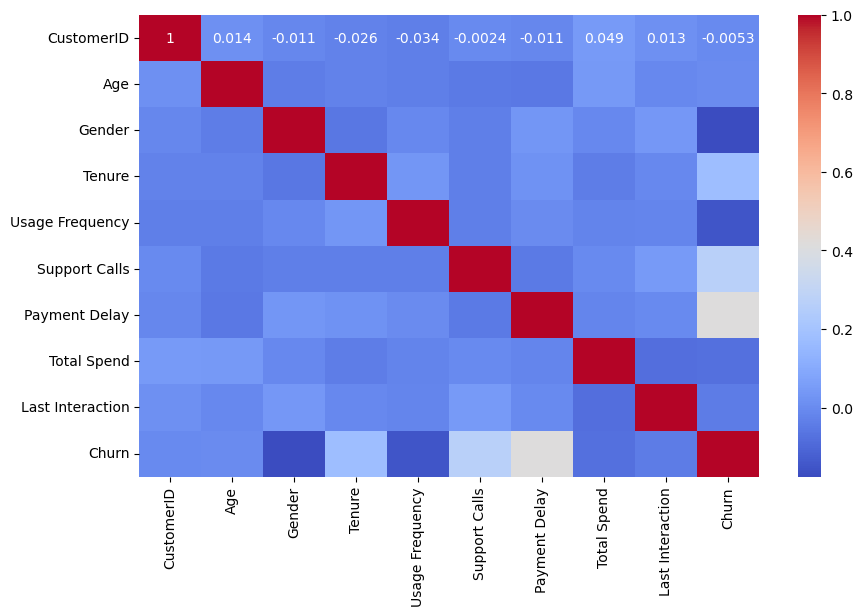

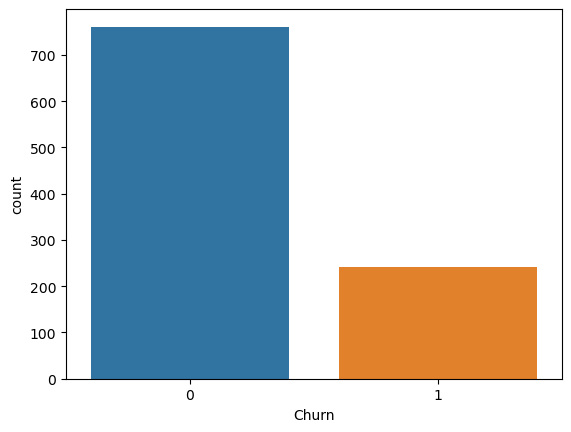

float64


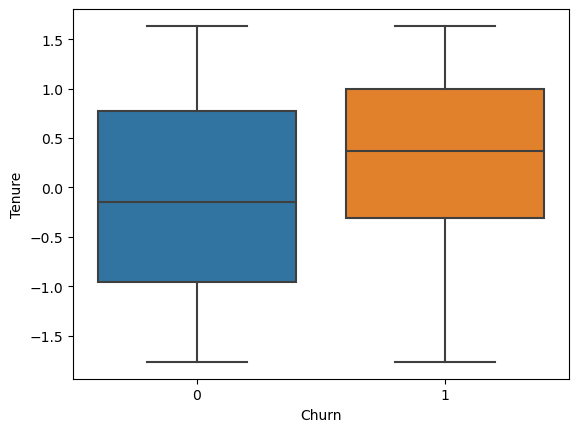

In [26]:
# Exploratory Data Analysis
# Making subset of numerial columns only
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Checking churn distribution
sns.countplot(x='Churn', data=data)
plt.show()

# For boxplot you have to ensure that 'Tenure' is numeric
print(data['Tenure'].dtype)  # It should be numeric like int64 or float64

# If it is numeric then you can plot the boxplot
sns.boxplot(x='Churn', y='Tenure', data=data)
plt.show()



In [31]:
# Feature Selection
X = numeric_data.drop(columns=['Churn', 'CustomerID'])
y = numeric_data['Churn']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Model Selection
# Logistic Regression Model
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [50]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Model Evaluation
# Logistic Regression Evaluation
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       149
           1       0.87      0.63      0.73        52

    accuracy                           0.88       201
   macro avg       0.88      0.80      0.83       201
weighted avg       0.88      0.88      0.87       201

Confusion Matrix:
 [[144   5]
 [ 19  33]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       149
           1       0.90      0.87      0.88        52

    accuracy                           0.94       201
   macro avg       0.93      0.92      0.92       201
weighted avg       0.94      0.94      0.94       201

Confusion Matrix:
 [[144   5]
 [  7  45]]


In [46]:
# **User input for prediction**
tenure_input = float(input("Enter the customer's Tenure in months: "))  # User se Tenure lein
monthly_charges_input = float(input("Enter the customer's Monthly Charges: "))  # User se Monthly Charges lein

# Create new_customer dictionary with user inputs
new_customer = {'Tenure': tenure_input, 'MonthlyCharges': monthly_charges_input}

# Convert to DataFrame
df_input = pd.DataFrame([new_customer])

# Preprocess the input
df_input_scaled = scaler.transform(df_input)

# Predict churn
prediction = rf.predict(df_input_scaled)

# Output the prediction
if prediction[0] == 1:
    print("The customer is predicted to churn.")
else:
    print("The customer is predicted to stay.")

Enter the customer's Tenure in months:  4
Enter the customer's Monthly Charges:  50000


The customer is predicted to stay.
